# Seleção de Características - Método Chi Squared

In [188]:
# O Método Chi Squared seleciona as k características que possuem maiores pontuações calculadas pelo algoritmo

### Bibliotecas Necessárias

In [189]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt

# Seleção de características com testes estatístico univariado
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Carga da base de dados original

In [190]:
# Carga da base original
dataset = pd.read_csv('dataset-normalizado.csv', header = 0)

# Reordena colocando a coluna is_approved no final da tabela
dataset = dataset[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Medu_0',
       'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2',
       'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'is_approved']]


In [191]:
print("Rows: {}".format(len(dataset)))
print("Columns: {}" .format(len(dataset.columns)))

dataset.head()

Rows: 1044
Columns: 52


,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,is_approved
0,0.0,0.0,0.428571,0.0,0.0,0.0,0.333333,0.333333,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.285714,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.666667,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.142857,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Aplicação da Seleção de Características

In [197]:
# Gera o array com os valores do dataset
array = dataset.values


# Separa em atributos e classe
features = array[:, 0:51]
target = array[:, 51]


# Extração das características
test = SelectKBest(score_func = chi2, k = 10)
fit = test.fit(features, target)


# Gera a pontuação de cada características
np.set_printoptions(precision=3)
scores = fit.scores_
# print(scores)


# Reduz o dataset para o número de características selecionadas
features = fit.transform(features)                                                              


# Exibe apenas as características selecionadas
# print(features[0:5,:])

### Descrição das características selecionadas

In [198]:
# Nome das características do dataset original
columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'traveltime', 'studytime', 'failures', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 
            'Dalc', 'Walc', 'health', 'absences', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 
            'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 
            'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 
            'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']


# Obtém as informações das caracteristicas
features_scores = fit.scores_


# Gera a tabela com as informações das características selecionadas
dataset_features = pd.DataFrame(columns, columns=['Features'])
dataset_features['Score of Feature'] = features_scores


# Número de características selecionadas
print("Number of features: {} features selected" .format(fit.k))


# Exibe a tabela de características, ordenadas pelo score das características
dataset_features.sort_values(by='Score of Feature', ascending=False)

Number of features: 10 features selected


,Features,Score of Feature
8,failures,65.583395
34,Mjob_at_home,32.321652
0,school,31.419802
28,Medu_4,31.195435
25,Medu_1,28.379591
33,Fedu_4,25.212126
30,Fedu_1,22.168961
3,address,16.350216
43,Fjob_teacher,12.677773
20,Dalc,10.746606


Text(0.5, 1.0, 'Importância de cada feature')

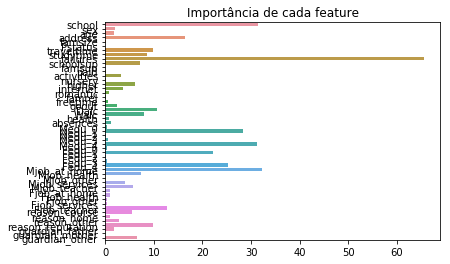

In [203]:
importances = pd.Series(data=features_scores, index=columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')